# Fine-tuning SpeechT5 para espa√±ol

This notebook demonstrates how to fine-tune the SpeechT5 model from ü§ó Transformers on the **text-to-speech** task.

The unique thing about SpeechT5 is that the model is first pre-trained on a combination of speech-to-text and text-to-speech data, so that it learns a unified space of hidden representations shared by both text and speech. This allows us to fine-tune the same pretrained model on different tasks. Read more about SpeechT5 [in our blog post](https://huggingface.co/blog/speecht5).

In this notebook we will start from an existing fine-tuned TTS model that was originally trained on English speech from LibriTTS, and fine-tune it for the Dutch language using the VoxPopuli dataset.

This TTS model will support multiple speakers through x-vector speaker embeddings.

## Instalamos los paquetes necesarios
Instalamos datasets de la libreria de Hugging Face que tiene varios conjuntos de datos.

Sound file es una biblioteca para leer y escribir archivos de audio

SpeechBrain es un toolkit para procesamiento de voz como sintetiz, reconocimiento, etc. Sirve para probar modelos o desarrollarlos.

Por ejemplo:
from speechbrain.pretrained import Tacotron2

** Usar un modelo TTS preentrenad**o
tts = Tacotron2.from_hparams(source="speechbrain/tts-tacotron2-ljspeech", savedir="tmpdir")
mel_output, wav_output, alignment = tts("Hello, how are you?")
tts.save_audio(wav_output, "output.wav")

In [ ]:
!pip install datasets soundfile speechbrain

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 13.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 824.8/824.8 kB 21.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 9.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-wmwrvk_d
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-wmwrvk_d
  Resolved https://github.com/huggingface/transformers.git to commit 3a8eb74668e9c2cc563b2f5c62fac174797063e0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.47.0.dev0-py3-none-any.whl size=10101071 sha256=75aa164e4233ee9e2c55c98f0e744b4acf4d0d429265c7700aad68ecc750b464
  Stored in directory: /tmp/pip-ephem-wheel-cache-k__cjmsz/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


In [ ]:
!pip install --upgrade accelerate

accelerate es una biblioteca de HF que sirve para ejecutar modelos en multiples cpus o gpus.

Verificamos nuestra GPU

In [ ]:
!nvidia-smi

Sat Nov 23 17:44:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--



```
# Tiene formato de c√≥digo
```
## Cargar el modelo

Comenzaremos con SpeechT5 y lo afinaremos nuevamente pero para un nuevo idioma.


In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

## Cargar el conjunto de datos

Afinaremos el modelo utilizando ejemplos en espa√±ol (c√≥digo de idioma `es`) del conjunto VoxPopuli.

VoxPopuli es un corpus multiling√ºe de voz a gran escala que contiene datos recopilados de grabaciones de eventos del Parlamento Europeo entre 2009 y 2020. Incluye datos de audio etiquetados con transcripciones para 15 idiomas europeos.

Puedes encontrar [VoxPopuli en el Hugging Face Hub](https://huggingface.co/datasets/facebook/voxpopuli). All√≠, puedes escuchar muestras de audio en cualquiera de los 15 idiomas europeos utilizando el visor de datos del conjunto.

Es importante notar que VoxPopuli, o cualquier otro conjunto de datos de reconocimiento autom√°tico de voz (ASR), no es necesariamente el mejor para entrenar modelos de TTS. Las caracter√≠sticas que lo hacen √∫til para ASR, como la presencia de mucho ruido en el audio, suelen ser lo que queremos evitar en TTS. Sin embargo, los conjuntos de datos de TTS de alta calidad, multiling√ºes y con m√∫ltiples hablantes son menos f√°ciles de encontrar que los conjuntos de ASR.

In [ ]:
from datasets import load_dataset, Audio

# Cargar solo el 1% del dataset de entrenamiento
dataset = load_dataset(
    "facebook/voxpopuli",
    "es",  # C√≥digo de idioma para espa√±ol
    split="train[:15%]"  # Cambiar el porcentaje seg√∫n tus necesidades
)

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

voxpopuli.py:   0%|          | 0.00/8.84k [00:00<?, ?B/s]

The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


data/n_files.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

asr_train.tsv:   0%|          | 0.00/22.1M [00:00<?, ?B/s]

asr_dev.tsv:   0%|          | 0.00/722k [00:00<?, ?B/s]

asr_test.tsv:   0%|          | 0.00/706k [00:00<?, ?B/s]

train_part_0.tar.gz:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

train_part_1.tar.gz:   0%|          | 0.00/1.83G [00:00<?, ?B/s]

train_part_2.tar.gz:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

train_part_3.tar.gz:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

train_part_4.tar.gz:   0%|          | 0.00/1.81G [00:00<?, ?B/s]

train_part_5.tar.gz:   0%|          | 0.00/1.87G [00:00<?, ?B/s]

train_part_6.tar.gz:   0%|          | 0.00/1.83G [00:00<?, ?B/s]

train_part_7.tar.gz:   0%|          | 0.00/1.85G [00:00<?, ?B/s]

train_part_8.tar.gz:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

train_part_9.tar.gz:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

train_part_10.tar.gz:   0%|          | 0.00/337M [00:00<?, ?B/s]

dev_part_0.tar.gz:   0%|          | 0.00/633M [00:00<?, ?B/s]

test_part_0.tar.gz:   0%|          | 0.00/629M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Es importante establecer la frecuencia de muestreo de los datos de audio en 16 kHz, que es lo que SpeechT5 espera.


In [ ]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

Vamos a verificar r√°pidamente cu√°ntos ejemplos hay en este conjunto de datos.


In [ ]:
len(dataset)

7638

That should be sufficient for fine-tuning. We'll have a closer look at these examples soon.

## Limpiar el texto

El conjunto de datos puede contener caracteres que no est√°n en el vocabulario del tokenizador de SpeechT5. Estos se convertir√°n en tokens `<unk>`.

Es importante notar que los ejemplos de VoxPopuli incluyen tanto `raw_text` como `normalized_text`, siendo este √∫ltimo todo en min√∫sculas. El tokenizador de SpeechT5 puede manejar may√∫sculas sin problemas, pero no tiene tokens para n√∫meros. En `normalized_text`, los n√∫meros est√°n escritos como texto, por lo que utilizaremos esa versi√≥n.


Primero necesitaremos identificar cu√°les son los tokens no soportados. El `SpeechT5Tokenizer` trabaja con caracteres como tokens, as√≠ que vamos a extraer todos los caracteres distintos del conjunto de datos. Escribimos una funci√≥n de mapeo `extract_all_chars` que concatena las transcripciones de todos los ejemplos en una √∫nica transcripci√≥n larga y luego transforma la cadena en un conjunto de caracteres. Es importante pasar los argumentos `batched=True` y `batch_size=-1` a `dataset.map(...)` para que la funci√≥n de mapeo tenga acceso a todas las transcripciones a la vez.


In [ ]:
tokenizer = processor.tokenizer

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/7638 [00:00<?, ? examples/s]

Ahora tenemos dos conjuntos de caracteres: uno con el vocabulario del conjunto de datos y otro con el vocabulario del tokenizador. Al tomar la diferencia entre estos conjuntos, encontramos los caracteres que est√°n en el conjunto de datos pero no en el tokenizador.


In [ ]:
dataset_vocab - tokenizer_vocab

{' ', '√°', '√≠', '√±', '√≥', '√∫', '√º'}

A continuaci√≥n, definiremos una funci√≥n para mapear estos caracteres a tokens v√°lidos y luego la aplicaremos al conjunto de datos. No es necesario manejar el espacio, ya que eso ya ha sido reemplazado por `‚ñÅ` en el tokenizador.


In [ ]:
replacements = [
    ('√†', 'a'),
    ('√ß', 'c'),
    ('√®', 'e'),
    ('√´', 'e'),
    ('√Ø', 'i'),
    ('√∂', 'o'),
    ('√º', 'u'),
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/7638 [00:00<?, ? examples/s]

## Hablantes

VoxPopuli es un conjunto de datos con m√∫ltiples hablantes. Sabemos que hay 20,968 ejemplos en el conjunto de datos, pero ¬øcu√°ntos hablantes hay y cu√°ntos ejemplos tiene cada uno?


In [ ]:
from collections import defaultdict
speaker_counts = defaultdict(int)

for speaker_id in dataset["speaker_id"]:
    speaker_counts[speaker_id] += 1

Al trazar un histograma, podemos obtener una idea de cu√°ntos datos hay para cada hablante.


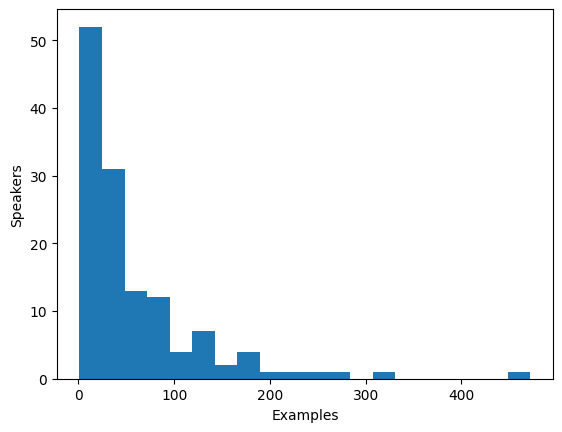

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

La gran mayoria de los hablantes tiene menos de 100 ejemplos. Aproximadamente diez o m√°s hablantes tienen m√°s de 500 ejemplos. Para acelerar el entrenamiento, limitemos el conjunto de datos a hablantes que tengan entre 100 y 400 ejemplos. Esto tambi√©n hace que el conjunto de datos sea m√°s equilibrado.


In [ ]:
def select_speaker(speaker_id):
    return 100 <= speaker_counts[speaker_id] <= 400

dataset = dataset.filter(select_speaker, input_columns=["speaker_id"])

Filter:   0%|          | 0/7638 [00:00<?, ? examples/s]

Veamos cuantas voces quedad

In [ ]:
len(set(dataset["speaker_id"]))

21

Y el numero de ejemplos

In [ ]:
len(dataset)

3559

Tenemos caci 3600 ejemplos y unos 21 hablantes o voces

Nota: Ser√≠a a√∫n mejor incluir la longitud de los ejemplos. Es bastante posible que los hablantes con pocos ejemplos tengan bastante audio disponible si esos ejemplos son relativamente largos. Sin embargo, lleva un tiempo escanear todo el conjunto de datos para encontrar esta informaci√≥n (ya que eso requiere cargar y decodificar cada archivo de audio), por lo que lo estamos omitiendo aqu√≠.


## Speaker embeddings

Para permitir que el modelo TTS distinga entre m√∫ltiples hablantes, necesitaremos crear un **embedding** de hablante para cada ejemplo. El **embedding** del hablante es simplemente una entrada adicional al modelo que captura las caracter√≠sticas vocales de un hablante particular.

Para crear los **embeddings** de hablante, utilizamos el modelo [spkrec-xvect-voxceleb](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb) de SpeechBrain. Lo siguiente define una funci√≥n `create_speaker_embedding()` que toma una forma de onda de audio de entrada y devuelve un vector de 512 elementos que contiene el **embedding** correspondiente al hablante.


In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

# Definimos el nombre del modelo del embebido de hablante que vamos a utilizar
spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

# Establecemos el dispositivo en "cuda" si hay GPU disponible, o "cpu" en caso contrario
device = "cuda" if torch.cuda.is_available() else "cpu"

# Cargamos el modelo preentrenado para la clasificaci√≥n de hablantes
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,  # El nombre del modelo de hablante preentrenado
    run_opts={"device": device},  # Opciones para ejecutar el modelo en el dispositivo (GPU o CPU)
    savedir=os.path.join("/tmp", spk_model_name)  # Carpeta donde se almacenar√°n los pesos del modelo
)

# Funci√≥n para crear el embedding del hablante a partir de la onda de audio
def create_speaker_embedding(waveform):
    with torch.no_grad():  # Desactivamos el c√°lculo de gradientes, ya que no necesitamos entrenar el modelo
        # Pasamos la forma de onda (audio) al modelo para obtener el embedding del hablante
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))

        # Normalizamos los embeddings para asegurar que todos est√©n en la misma escala
        # Normalizaci√≥n en el eje 2 (dim=2) porque el embedding tiene una dimensi√≥n adicional para cada batch.
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)

        # Eliminamos cualquier dimensi√≥n extra innecesaria y convertimos el tensor a un array de numpy
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()

    return speaker_embeddings  # Retornamos el embedding del hablante


<ipython-input-20-b1c17f7845f6>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

Nota: El modelo `speechbrain/spkrec-xvect-voxceleb` fue entrenado con habla en ingl√©s del conjunto de datos VoxCeleb, mientras que nuestros ejemplos de entrenamiento est√°n en espa√±ol. Estamos asumiendo que este modelo a√∫n generar√° **embeddings** razonables para los hablantes, pero esto puede no ser cierto. Entrenar primero un modelo X-vector en el habla objetivo, como el espa√±ol, podr√≠a funcionar mejor.


## Preparando el dataset

La funci√≥n `prepare_dataset` toma un solo ejemplo y utiliza el objeto `SpeechT5Processor` para tokenizar el texto de entrada y cargar el audio objetivo en un **log-mel spectrogram**. Tambi√©n agrega los **embeddings** del hablante como una entrada adicional.


In [ ]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

Verifiquemos que el procesamiento sea correcto observando un solo ejemplo:


In [ ]:
processed_example = prepare_dataset(dataset[0])

Esto deber√≠a darnos:

- los tokens para el texto de entrada en `input_ids`
- el **embedding** del hablante en `speaker_embeddings`
- el **espectrograma** objetivo en `labels`


In [ ]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

Los tokens deber√≠an decodificarse en el texto original, con `</s>` para marcar el final de la oraci√≥n.


In [ ]:
tokenizer.decode(processed_example["input_ids"])

'y desde luego esa raz<unk> n no puede tener que ver con la explicaci<unk> n surrealista que hemos escuchado m<unk> s de una vez de que se trata de una conspiraci<unk> n izquierdista.</s>'

Los **embeddings** del hablante deber√≠an ser un vector de 512 elementos:

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

Las **etiquetas** deber√≠an ser un **espectrograma log-mel** con 80 bins mel.


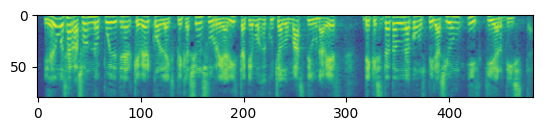

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

Si ejecutamos un **vocoder** sobre el **espectrograma log-mel**, deber√≠a producir el audio original nuevamente. Cargaremos el **vocoder HiFi-GAN** desde el **checkpoint** original de [SpeechT5](https://hf.co/microsoft/speecht5_hifigan).


In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [ ]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

¬°Todo eso se ve y suena bien! Ahora podemos procesar todo el conjunto de datos. Esto tomar√° entre 5 y 10 minutos.


In [ ]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/3559 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (610 > 600). Running this sequence through the model will result in indexing errors


Algunos de los ejemplos en el conjunto de datos aparentemente son m√°s largos que la longitud m√°xima de entrada que el modelo puede manejar (600 tokens), por lo que debemos eliminar esos ejemplos del conjunto de datos. De hecho, para permitir tama√±os de batch m√°s grandes, eliminaremos cualquier ejemplo que tenga m√°s de 200 tokens.


In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/3559 [00:00<?, ? examples/s]

Veamos cuantos ejemplos quedan despues de filtrar

In [ ]:
len(dataset)

2358

## Train/test split

Creamos una divisi√≥n b√°sica de entrenamiento/prueba. Para nuestros fines, est√° bien si el mismo hablante forma parte de ambos conjuntos.


In [ ]:
dataset = dataset.train_test_split(test_size=0.1)

Veamos como luce nuestro dataset

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 2122
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 236
    })
})

## Collator para crear batches

Necesitamos definir un **collator** personalizado para combinar varios ejemplos en un batch. Esto rellenar√° las secuencias m√°s cortas con tokens de relleno. Para las **etiquetas del espectrograma**, las porciones rellenadas se reemplazar√°n con el valor especial `-100`. Este valor especial le indica al modelo que ignore esa parte del espectrograma al calcular la p√©rdida del espectrograma.


In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

# Definimos una clase que representa el collation de datos para la preparaci√≥n del batch
@dataclass
class TTSDataCollatorWithPadding:
    processor: Any  # El procesador, que manejar√° el padding y otras transformaciones

    # El m√©todo __call__ hace que esta clase sea callable, es decir, se puede usar como una funci√≥n
    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        # Extraemos los input_ids de cada ejemplo en el batch
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]

        # Extraemos las caracter√≠sticas de los labels (espectrogramas) de cada ejemplo
        label_features = [{"input_values": feature["labels"]} for feature in features]

        # Extraemos los embeddings de hablante de cada ejemplo
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # Usamos el procesador para rellenar (pad) las secuencias y crear un batch
        # Se rellenan los input_ids y los labels para que tengan la misma longitud
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",  # Indicamos que los tensores devueltos sean del tipo PyTorch
        )

        # Reemplazamos las posiciones de padding en las etiquetas (labels) con el valor especial -100
        # Esto le indica al modelo que ignore esas partes al calcular la p√©rdida
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # Eliminamos la m√°scara de atenci√≥n del decodificador, ya que no se usa durante el fine-tuning
        del batch["decoder_attention_mask"]

        # Si el modelo usa un factor de reducci√≥n mayor que 1 (por ejemplo, submuestreo de las secuencias),
        # redondeamos la longitud de las etiquetas para que sea un m√∫ltiplo del factor de reducci√≥n
        if model.config.reduction_factor > 1:
            # Obtenemos las longitudes de las secuencias de las etiquetas
            target_lengths = torch.tensor([len(feature["input_values"]) for feature in label_features])

            # Redondeamos las longitudes para que sean m√∫ltiplos del factor de reducci√≥n
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])

            # Determinamos la longitud m√°xima y ajustamos el batch para que todas las secuencias sean de la misma longitud
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # Agregamos los embeddings de los hablantes al batch
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        # Retornamos el batch procesado con todos los datos necesarios
        return batch


En **SpeechT5**, la entrada a la parte del decodificador del modelo se reduce por un factor de 2. En otras palabras, se elimina cada otro **timestamp** de la secuencia objetivo. Luego, el decodificador predice una secuencia que es el doble de larga. Dado que la longitud original de la secuencia objetivo puede ser impar, el **collator** de datos se asegura de redondear la longitud m√°xima del batch hacia abajo para que sea un m√∫ltiplo de 2.


In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

Probemos nuestro collator

In [ ]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)

In [ ]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 171]),
 'attention_mask': torch.Size([3, 171]),
 'labels': torch.Size([3, 522, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

## Training

Siempre es una buena idea subir los **checkpoints** del modelo directamente al [Hugging Face Hub](https://huggingface.co/) mientras se entrena. Para permitir esto, primero debes iniciar sesi√≥n en el Hub ingresando tu token de autenticaci√≥n:


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

La opci√≥n `use_cache=True` es incompatible con el **gradient checkpointing**. Desact√≠vala durante el entrenamiento, de lo contrario, el modelo seguir√° generando errores al respecto.


In [ ]:
model.config.use_cache = False

Define los **argumentos de entrenamiento**.

No vamos a calcular ninguna m√©trica de evaluaci√≥n durante el proceso de entrenamiento. En su lugar, solo observaremos la **p√©rdida**. Cuanto m√°s baja sea la p√©rdida, mejor ser√° el modelo.

Nota: Si no deseas subir los **checkpoints** del modelo al Hub, establece `push_to_hub=False`.


In [ ]:
from transformers import Seq2SeqTrainingArguments

# Definimos los argumentos para el entrenamiento utilizando la clase Seq2SeqTrainingArguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_voxpopuli_es",  # Directorio donde se guardar√°n los checkpoints del modelo y otros resultados del entrenamiento
    per_device_train_batch_size=16,  # Tama√±o de batch por dispositivo durante el entrenamiento (n√∫mero de ejemplos por paso de entrenamiento)
    gradient_accumulation_steps=2,  # N√∫mero de pasos de gradiente que se acumulan antes de realizar una actualizaci√≥n de los pesos (√∫til para aumentar el tama√±o efectivo del batch)
    learning_rate=1e-5,  # Tasa de aprendizaje para el optimizador (determinando la velocidad con la que el modelo ajusta sus pesos)
    warmup_steps=500,  # N√∫mero de pasos de calentamiento (warmup) antes de que la tasa de aprendizaje comience a decrecer
    max_steps=4000,  # N√∫mero m√°ximo de pasos de entrenamiento antes de detenerse (n√∫mero total de iteraciones)
    gradient_checkpointing=True,  # Habilitar el **gradient checkpointing** para ahorrar memoria durante el entrenamiento (especialmente √∫til con modelos grandes)
    fp16=True,  # Usar precisi√≥n de 16 bits en lugar de 32 bits para reducir el uso de memoria y acelerar el entrenamiento
    evaluation_strategy="steps",  # Realizar evaluaciones durante el entrenamiento en pasos espec√≠ficos
    per_device_eval_batch_size=8,  # Tama√±o de batch durante la evaluaci√≥n (por dispositivo)
    save_steps=1000,  # Guardar un checkpoint cada 1000 pasos de entrenamiento
    eval_steps=1000,  # Evaluar el modelo cada 1000 pasos
    logging_steps=25,  # Registrar informaci√≥n de entrenamiento cada 25 pasos (para ver el progreso)
    report_to=["tensorboard"],  # Enviar los registros de entrenamiento a **TensorBoard** para su visualizaci√≥n
    load_best_model_at_end=True,  # Cargar autom√°ticamente el mejor modelo (seg√∫n el rendimiento en evaluaci√≥n) al final del entrenamiento
    greater_is_better=False,  # Indicar si las m√©tricas de evaluaci√≥n deben ser mejores cuando son m√°s peque√±as o m√°s grandes (en este caso, se espera que la p√©rdida sea m√°s baja)
    label_names=["labels"],  # Especificar el nombre de las etiquetas en el modelo (se usa para hacer seguimiento de la p√©rdida)
    push_to_hub=True,  # Subir los checkpoints y el modelo entrenado al **Hugging Face Hub** para almacenamiento y uso posterior
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1570: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


Crea el objeto **trainer** utilizando el modelo, el conjunto de datos y el **data collator**.


In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

<ipython-input-46-4a9303382841>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


¬°Y con eso, estamos listos para comenzar el entrenamiento!

El entrenamiento tomar√° varias horas dependiendo de tu GPU o de la que est√© asignada en Google Colab. Dependiendo de tu GPU, es posible que encuentres un error de "out-of-memory" de **CUDA** cuando comiences el entrenamiento. En ese caso, puedes reducir el **`per_device_train_batch_size`** de manera incremental en factores de 2 y aumentar **`gradient_accumulation_steps`** por 2x para compensar.


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2774: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=4000, training_loss=0.5072376139163971, metrics={'train_runtime': 8055.8101, 'train_samples_per_second': 15.889, 'train_steps_per_second': 0.497, 'total_flos': 2.056217959052928e+16, 'train_loss': 0.5072376139163971, 'epoch': 59.70676691729323})

In [ ]:
#cargar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Ruta de destino en tu Google Drive
dest_path = "/content/drive/MyDrive/speecht5_tts_voxpopuli_es/checkpoint-4000"

# Ruta de origen
source_path = "/content/speecht5_tts_voxpopuli_es/checkpoint-4000"

# Mover la carpeta
shutil.move(source_path, dest_path)

print(f"Carpeta movida a {dest_path}")

Carpeta movida a /content/drive/MyDrive/speecht5_tts_voxpopuli_es/checkpoint-4000


## Evaluar

Despu√©s de que termine el entrenamiento, ¬°vamos a usar el modelo para sintetizar algo de habla!



In [ ]:
model = SpeechT5ForTextToSpeech.from_pretrained("/content/speecht5_tts_voxpopuli_es/checkpoint-4000")

Primero necesitamos obtener una **embedding** del hablante. Podemos simplemente tomar una del conjunto de prueba.


In [ ]:
example = dataset["test"][234]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

Define un texto de entrada y token√≠zalo.


In [ ]:
text = "Bienvenido al sistema"

In [ ]:
#tokenizer.decode(tokenizer(text)["input_ids"])

In [ ]:
inputs = processor(text=text, return_tensors="pt")

Indica al modelo que genere un espectrograma a partir del texto de entrada.


In [ ]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

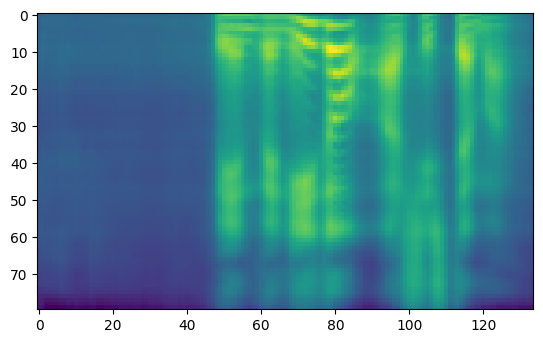

In [ ]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

Finalmente, usa el **vocoder** para convertir el espectrograma en sonido.


In [ ]:
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

In [ ]:
import soundfile as sf
sf.write("output.wav", speech.numpy(), samplerate=16000)

Una nota final sobre preocupaciones √©ticas: aunque la tecnolog√≠a TTS tiene muchos usos beneficiosos, tambi√©n puede ser utilizada para fines nefastos, como imitar la voz de alguien sin su permiso. ¬°Por favor, usa la tecnolog√≠a TTS de manera sabia y responsable!
